# Instalación de paquetes // Package instalation 

[ESP] \
En primer lugar instalamos los paquetes que vamos a utilizar, en este caso:

* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit-learn

Lo haremos mediante el comando `!pip install [nombre_paquete]`

[ENG] \
First, let's install the packages we're going to use, in this case:

* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit-learn

We'll be using the command `!pip install [package_name]`

In [1]:
! pip install pandas
! pip install seaborn
! pip install numpy
! pip install matplotlib
! pip install scikit-learn==1.3

# Importación de paquetes // Importing packages

[ESP] \
Seguidamente los importamos con `import [nombre_paquete] as [alias]`

En el caso de scikit-learn solo utilizaremos una función de esta librería por ende nos limitamos a importar solo esta

[ENG] \
Next we import the packages using `import [package_name] as [alias]`

In scikit-learn's case we will only use one of the functions from this library, so we only import said function

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/tmp/ipykernel_13894/3521790389.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Cargamos el dataset // Loading the dataset

[ESP] \
Seguidamente cargaremos el dataset y comprobaremos que se haya cargado bien mostrando un ejemplo de las 5 primeras filas del mismo

[ENG] \
Next we load the dataset and check if there is any problem showing the first 5 rows as an example

In [3]:
#cargamos el dataset // loading the dataset
df = sns.load_dataset("tips")
#comprobamos mostrando las 5 primeras filas // showing the first 5 rows
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Exploramos el dataset // Exploring the dataset

[ESP] \
En este apartado comprobaremos el tamaño del dataset, el contenido de sus columnas, sus estadísticas básicas y si contiene nulos

[ENG] \
In this section, we check the dataset's size, the content of its columns, its base statistics, and if it shows any null values

## Tamaño del dataset // Dataset's size

[ESP] \
Para ello usaremos el método de pandas .info() que nos mostrará tanto las columnas como su tipo, si contiene valores nulos y el conteo de tuplas.

[ENG] \
For this purpose we'll use Panda's method .info() that will show us the columns, their type, if they contain any null values, and the rows' count


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


[ESP] \
Podemos observar que:
* Contamos con 7 columnas, de las cuales nuestra columna a predecir será TIP
* Contamos con 244 entradas
* No contiene nulos

[ENG] \
We can observe that:
* We have 7 columns, from which  we want to predict the column TIP
* There are 244 entries in total
* The dataset does not contain any null values

# Preprocesamiento // Preprocessing

## Valores Nulos // Null values

[ESP] \
Utilizando el método .isnull() de panda y vemos que efectivamente no contiene nulos

[ENG] \
Using the .isnull() method we can see that there's in fact no null values

In [5]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
# si los hubiese utilizaríamos // if there were any null values we would use
from sklearn.impute import SimpleImputer

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

imputer_num = SimpleImputer(strategy='median') # para valores numéricos // for numeric values
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

imputer_cat = SimpleImputer(strategy='most_frequent') # para valores de texto // for categorical values
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Valores categóricos a numéricos

[ESP] \
Utilizamos el método de pandas .get_dummies(args) para pasar las columnas de texto a número y generamos un nuevo dataframe donde volcar esta información para no alterar el df original

[ENG] \
We use Panda's method .get_dummies(args) to convert categorical columns to numeric columns and we generate a new dataframe where we will dump the information in order to not modify the original dataframe

In [19]:

dfDummies = pd.get_dummies(df, columns=["sex", "smoker", "time"], drop_first=True)
dfDummies = pd.get_dummies(dfDummies, columns=["day"])

dfDummies['sex_Male']= dfDummies['sex_Male'].astype('int64')
dfDummies['smoker_Yes']= dfDummies['smoker_Yes'].astype('int64')
dfDummies['time_Lunch']= dfDummies['time_Lunch'].astype('int64')
dfDummies['day_Fri']= dfDummies['day_Fri'].astype('int64')
dfDummies['day_Sat']= dfDummies['day_Sat'].astype('int64')
dfDummies['day_Sun']= dfDummies['day_Sun'].astype('int64')
dfDummies['day_Thur']= dfDummies['day_Thur'].astype('int64')


dfDummies.head()

,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2.0,0,0,0,0,0,1,0
1,10.34,1.66,3.0,1,0,0,0,0,1,0
2,21.01,3.50,3.0,1,0,0,0,0,1,0
3,23.68,3.31,2.0,1,0,0,0,0,1,0
4,24.59,3.61,4.0,0,0,0,0,0,1,0


# Outliners

PENDING TO REDACT 

In [20]:
# Identificar outliers utilizando el método del rango intercuartílico
Q1 = dfDummies['total_bill'].quantile(0.25)
Q3 = dfDummies['total_bill'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers = dfDummies[(dfDummies['total_bill'] < lower_bound) | (dfDummies['total_bill'] > upper_bound)]

# Mostrar los outliers
print("Outliers:")
print(outliers)

# Eliminar los outliers del DataFrame original
dfDummies = dfDummies[(dfDummies['total_bill'] >= lower_bound) & (dfDummies['total_bill'] <= upper_bound)]

# Mostrar el DataFrame sin outliers
print("\nDataFrame sin outliers:")
print(dfDummies)

Outliers:
     total_bill    tip  size  sex_Male  smoker_Yes  time_Lunch  day_Fri  \
59        48.27   6.73   4.0         1           0           0        0   
102       44.30   2.50   3.0         0           1           0        0   
142       41.19   5.00   5.0         1           0           1        0   
156       48.17   5.00   6.0         1           0           0        0   
170       50.81  10.00   3.0         1           1           0        0   
182       45.35   3.50   3.0         1           1           0        0   
184       40.55   3.00   2.0         1           1           0        0   
197       43.11   5.00   4.0         0           1           1        0   
212       48.33   9.00   4.0         1           0           0        0   

     day_Sat  day_Sun  day_Thur  
59         1        0         0  
102        1        0         0  
142        0        0         1  
156        0        1         0  
170        1        0         0  
182        0        1         0  
1

# EDA

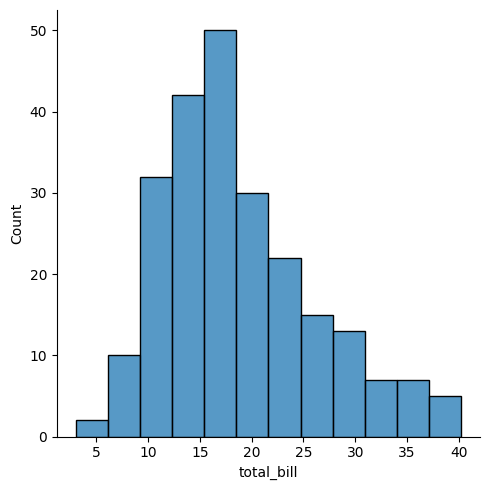

In [21]:
sns.displot(dfDummies['total_bill'])

[ESP] \
Generamos un histograma (esta vez utilizando el DF nuevo) para explorar los datos de nuestro DataFrame

[ENG] \
We generate a histogram (using the new dataframe) in order to explore the data from our DataFrame.

/tmp/ipykernel_13894/1637745769.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dfDummies.hist(ax = ax)


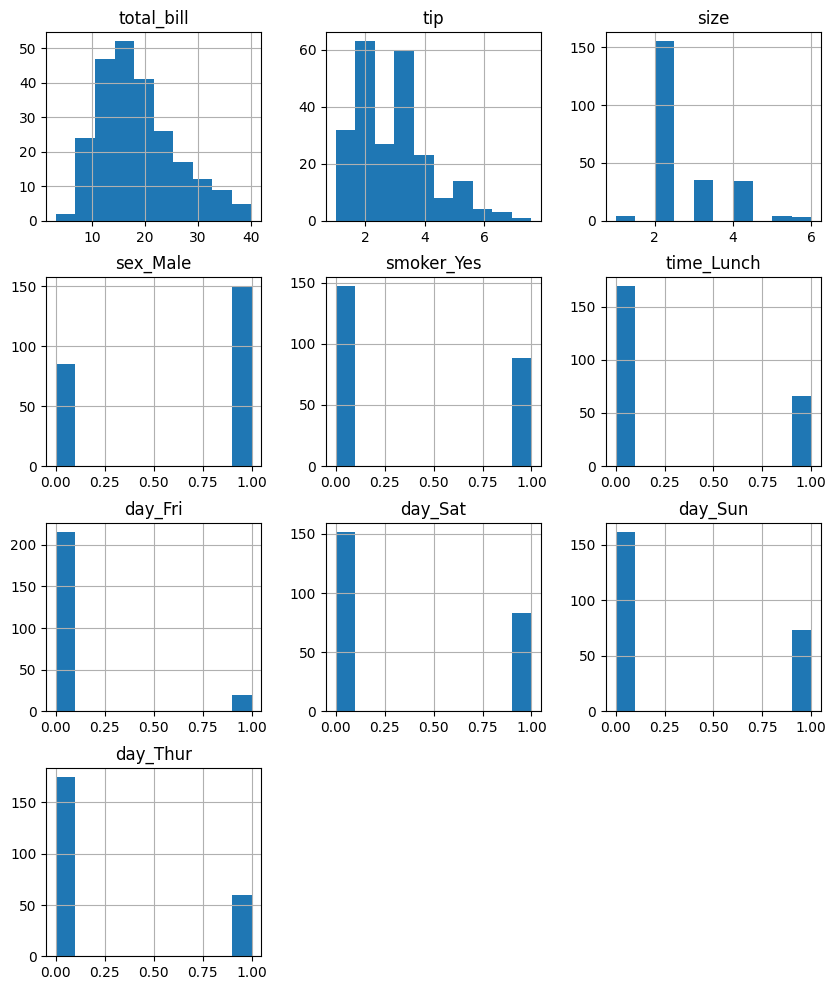

In [22]:
fig = plt.figure(figsize = (10,12))
ax = fig.gca()
dfDummies.hist(ax = ax) 
plt.show()

[ESP] \
Podemos ver la separación de los días usando el dataset sin corregir

[ENG] \
We can see that the day count using the raw dataset

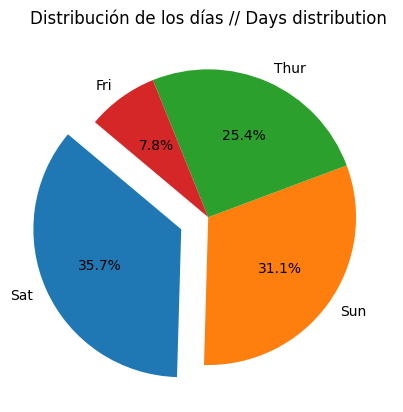

In [23]:
day_counts = df['day'].value_counts()

# Crear el gráfico de tarta // Creating pie chart
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140,explode=[0.2,0,0,0])
plt.title('Distribución de los días // Days distribution') #Checkear que está OK
plt.show()

[ESP] \
Seguidamente generamos un heatmap para ver qué columnas tienen más peso sobre la columna a predecir (tips)

[ENG] \
Next we generate a heatmap in order to see which columns have the highest weight over the column to predict (tips)

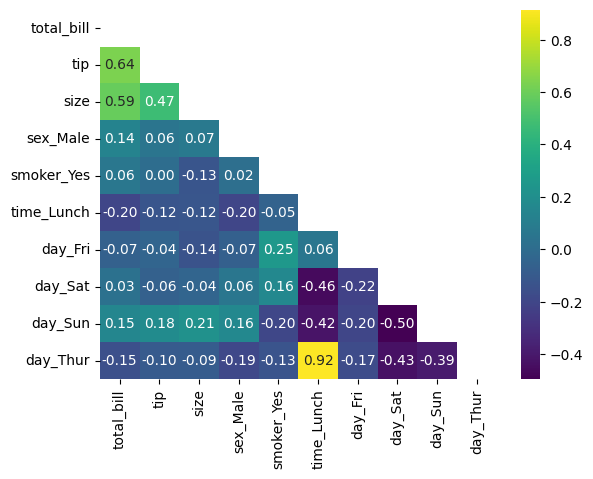

In [24]:
correlation_matrix = dfDummies.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", mask=mask)

plt.show()

[ESP] \
Vemos que las que tienen más relación son size, day_Sun, time_Lunch

Por lo cual deducimos que:
* tendrán más propinas cuanto mayor sea la cuenta
* tendrán mas propinas cuanto más grande sea la mesa (cuantos más sean a comer/cenar)
* tendrán más propinas si es a la hora de cenar
* El día que tendrán más propinas será "Sunday" (Domingo) y el que menos "Thursday" (Jueves)

[ENG] \
We can see that those columns with more correlation are size, day_Sun, and time_Lunch

So we can deduce:
* The bigger the check, the bigger the tip
* They will have more tips if the table is larger (more people to serve)
* They will have more tips if it's dinnertime
* The day with more tips would be the Sunday and the day with less tips would be Thursday

[ESP] \
Podemos también explorar con un scatterplot para las columnas 'total_bill' con 'tip' y diferenciar entre si es hombre o mujer 

[ENG] \
We can also explore with a scatterplot over the 'total_bill' and 'tip' columns and diferentiate between men and women

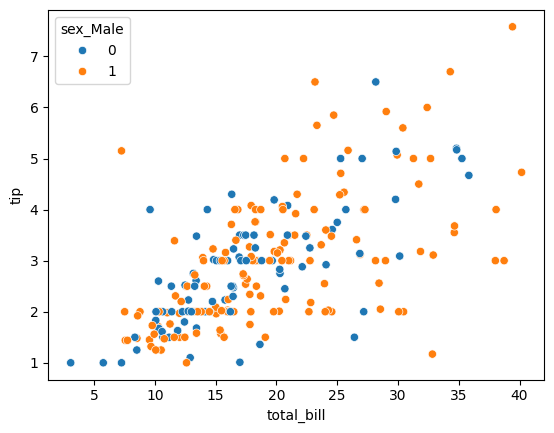

In [25]:
sns.scatterplot(x='total_bill',y='tip',data=dfDummies,hue='sex_Male')
plt.show()

[ESP] \
Podemos hacer lo mismo con los días de la semana, podemos ver la diferencia con el gráfico anterior puesto que en este usamos el DF original y tenemos aún los outliners

[ENG] \
We can do the same with the days of the week

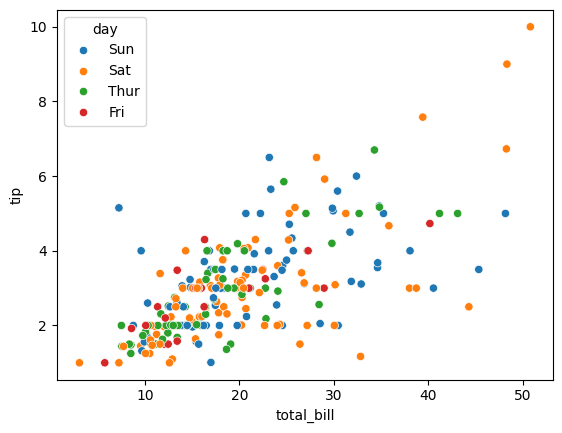

In [28]:
sns.scatterplot(x='total_bill',y='tip',data=df,hue='day')
plt.show()